In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_species = pd.read_csv('df_species_result.csv')


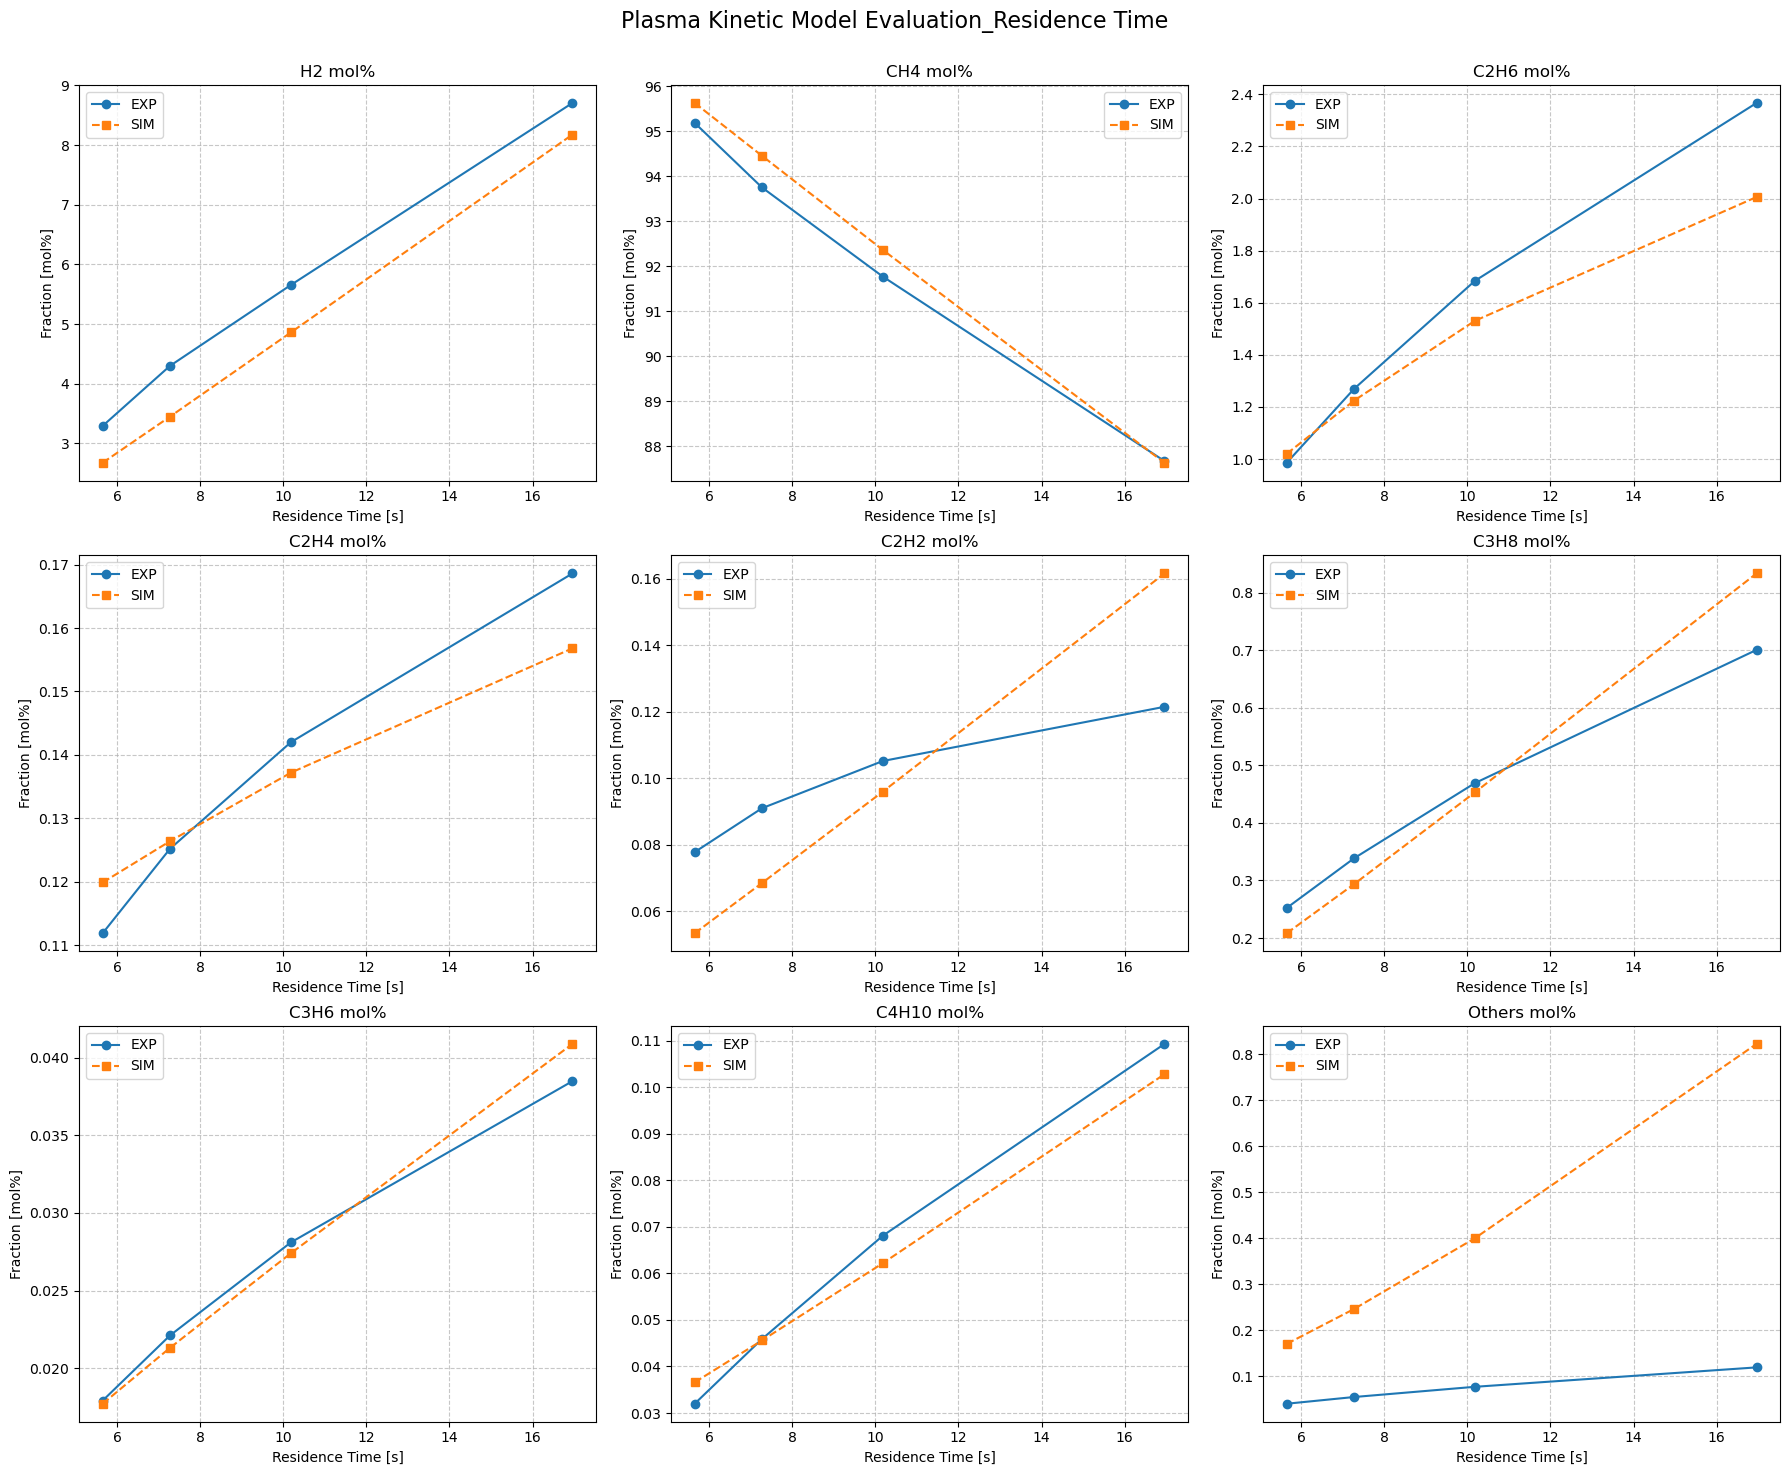

각 성분별 절대 오차 범위 (단위: mol%)
--------------------------------------------------
H2:
  최소 오차: 0.5293
  최대 오차: 0.8510
  평균 오차: 0.6984
--------------------------------------------------
CH4:
  최소 오차: 0.0380
  최대 오차: 0.7039
  평균 오차: 0.4445
--------------------------------------------------
C2H6:
  최소 오차: 0.0344
  최대 오차: 0.3609
  평균 오차: 0.1484
--------------------------------------------------
C2H4:
  최소 오차: 0.0012
  최대 오차: 0.0118
  평균 오차: 0.0065
--------------------------------------------------
C2H2:
  최소 오차: 0.0092
  최대 오차: 0.0401
  평균 오차: 0.0240
--------------------------------------------------
C3H8:
  최소 오차: 0.0161
  최대 오차: 0.1327
  평균 오차: 0.0594
--------------------------------------------------
C3H6:
  최소 오차: 0.0002
  최대 오차: 0.0024
  평균 오차: 0.0010
--------------------------------------------------
C4H10:
  최소 오차: 0.0003
  최대 오차: 0.0065
  평균 오차: 0.0043
--------------------------------------------------
Others:
  최소 오차: 0.1301
  최대 오차: 0.7031
  평균 오차: 0.3369
-----------------------------

In [3]:
# 4.317 W/cm3 데이터만 필터링
df_filtered = df_species[df_species['Power [W/cm3]'] == 4.317]

# 그래프를 그릴 성분들 정의
components = ['H2', 'CH4', 'C2H6', 'C2H4', 'C2H2', 'C3H8', 'C3H6', 'C4H10', 'Others']

# 서브플롯 생성
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# 각 성분별 절대 오차 계산을 위한 딕셔너리
error_stats = {}

# 각 성분별로 그래프 그리기
for i, component in enumerate(components):
    ax = axes[i]
    
    # 실험값과 시뮬레이션값 열 이름
    exp_col = f'{component}_exp [mol%]' if component != 'Others' else 'Others _exp[mol%]'
    sim_col = f'{component}_sim [mol%]' if component != 'Others' else 'Others_sim [mol%]'
    
    # 그래프 그리기
    ax.plot(df_filtered['Time [s]'], df_filtered[exp_col], 'o-', label='EXP')
    ax.plot(df_filtered['Time [s]'], df_filtered[sim_col], 's--', label='SIM')
    
    # 절대 오차 계산
    abs_error = (df_filtered[sim_col] - df_filtered[exp_col]).abs()
    error_stats[component] = {
        '최소 오차': abs_error.min(),
        '최대 오차': abs_error.max(),
        '평균 오차': abs_error.mean()
    }
    
    # 그래프 설정
    ax.set_title(f'{component} mol%')
    ax.set_xlabel('Residence Time [s]')
    ax.set_ylabel('Fraction [mol%]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()
plt.suptitle('Plasma Kinetic Model Evaluation_Residence Time', fontsize=16)
plt.subplots_adjust(top=0.93)

plt.show()

# 각 성분별 절대 오차 범위 출력
print("각 성분별 절대 오차 범위 (단위: mol%)")
print("-" * 50)
for component, stats in error_stats.items():
    print(f"{component}:")
    print(f"  최소 오차: {stats['최소 오차']:.4f}")
    print(f"  최대 오차: {stats['최대 오차']:.4f}")
    print(f"  평균 오차: {stats['평균 오차']:.4f}")
    print("-" * 50)

C:\Users\USER\AppData\Local\Temp\ipykernel_29960\2999326935.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_time_filtered = df_species.groupby('Power [W/cm3]').apply(


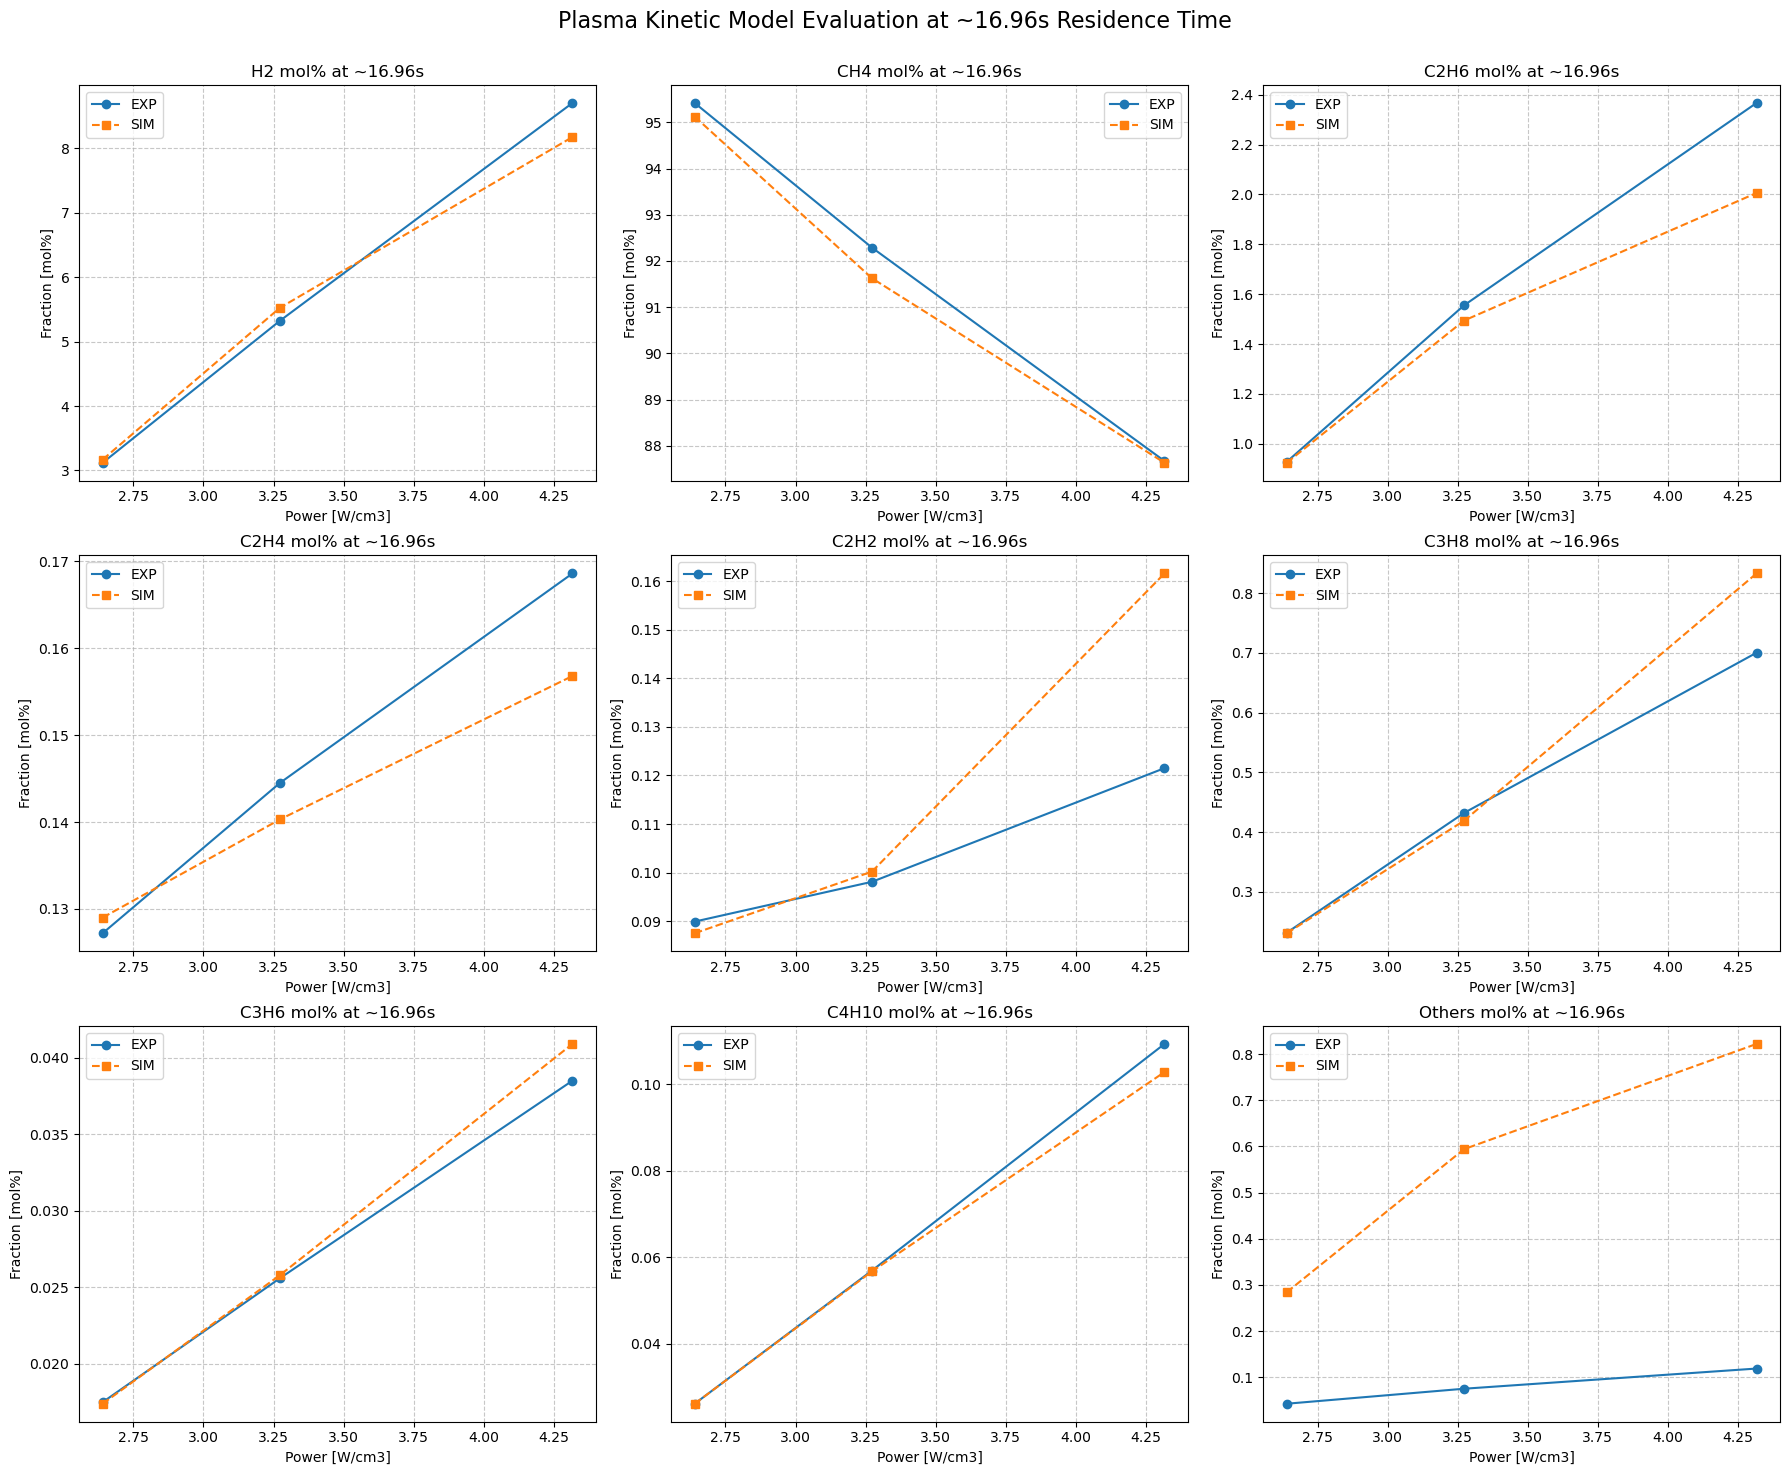

선택된 데이터의 실제 시간 값: [16.96 16.96 16.96]

각 성분별 절대 오차 범위 (단위: mol%)
--------------------------------------------------
H2:
  최소 오차: 0.0494
  최대 오차: 0.5293
  평균 오차: 0.2602
--------------------------------------------------
CH4:
  최소 오차: 0.0380
  최대 오차: 0.6629
  평균 오차: 0.3320
--------------------------------------------------
C2H6:
  최소 오차: 0.0037
  최대 오차: 0.3609
  평균 오차: 0.1419
--------------------------------------------------
C2H4:
  최소 오차: 0.0018
  최대 오차: 0.0118
  평균 오차: 0.0059
--------------------------------------------------
C2H2:
  최소 오차: 0.0021
  최대 오차: 0.0401
  평균 오차: 0.0149
--------------------------------------------------
C3H8:
  최소 오차: 0.0009
  최대 오차: 0.1327
  평균 오차: 0.0489
--------------------------------------------------
C3H6:
  최소 오차: 0.0001
  최대 오차: 0.0024
  평균 오차: 0.0009
--------------------------------------------------
C4H10:
  최소 오차: 0.0000
  최대 오차: 0.0065
  평균 오차: 0.0022
--------------------------------------------------
Others:
  최소 오차: 0.2415
  최대 오차: 0.7031
  평균 오

In [4]:
# 16.96s 시간에서 Power별 성분 비교 그래프 생성

# 16.96s에 가장 가까운 시간 데이터 필터링
target_time = 16.96
df_time_filtered = df_species.groupby('Power [W/cm3]').apply(
    lambda x: x.iloc[(x['Time [s]'] - target_time).abs().argsort()[:1]]
).reset_index(drop=True)

# 그래프를 그릴 성분들 정의
components = ['H2', 'CH4', 'C2H6', 'C2H4', 'C2H2', 'C3H8', 'C3H6', 'C4H10', 'Others']

# 서브플롯 생성
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

# 각 성분별 절대 오차 계산을 위한 딕셔너리
error_stats = {}

# 각 성분별로 그래프 그리기
for i, component in enumerate(components):
    ax = axes[i]
    
    # 실험값과 시뮬레이션값 열 이름
    exp_col = f'{component}_exp [mol%]' if component != 'Others' else 'Others _exp[mol%]'
    sim_col = f'{component}_sim [mol%]' if component != 'Others' else 'Others_sim [mol%]'
    
    # 그래프 그리기
    ax.plot(df_time_filtered['Power [W/cm3]'], df_time_filtered[exp_col], 'o-', label='EXP')
    ax.plot(df_time_filtered['Power [W/cm3]'], df_time_filtered[sim_col], 's--', label='SIM')
    
    # 절대 오차 계산
    abs_error = (df_time_filtered[sim_col] - df_time_filtered[exp_col]).abs()
    error_stats[component] = {
        '최소 오차': abs_error.min(),
        '최대 오차': abs_error.max(),
        '평균 오차': abs_error.mean()
    }
    
    # 그래프 설정
    ax.set_title(f'{component} mol% at ~16.96s')
    ax.set_xlabel('Power [W/cm3]')
    ax.set_ylabel('Fraction [mol%]')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.7)

# 레이아웃 조정
plt.tight_layout()
plt.suptitle(f'Plasma Kinetic Model Evaluation at ~16.96s Residence Time', fontsize=16)
plt.subplots_adjust(top=0.93)

plt.show()

# 실제 선택된 시간 값 확인
print(f"선택된 데이터의 실제 시간 값: {df_time_filtered['Time [s]'].values}")

# 각 성분별 절대 오차 범위 출력
print("\n각 성분별 절대 오차 범위 (단위: mol%)")
print("-" * 50)
for component, stats in error_stats.items():
    print(f"{component}:")
    print(f"  최소 오차: {stats['최소 오차']:.4f}")
    print(f"  최대 오차: {stats['최대 오차']:.4f}")
    print(f"  평균 오차: {stats['평균 오차']:.4f}")
    print("-" * 50)


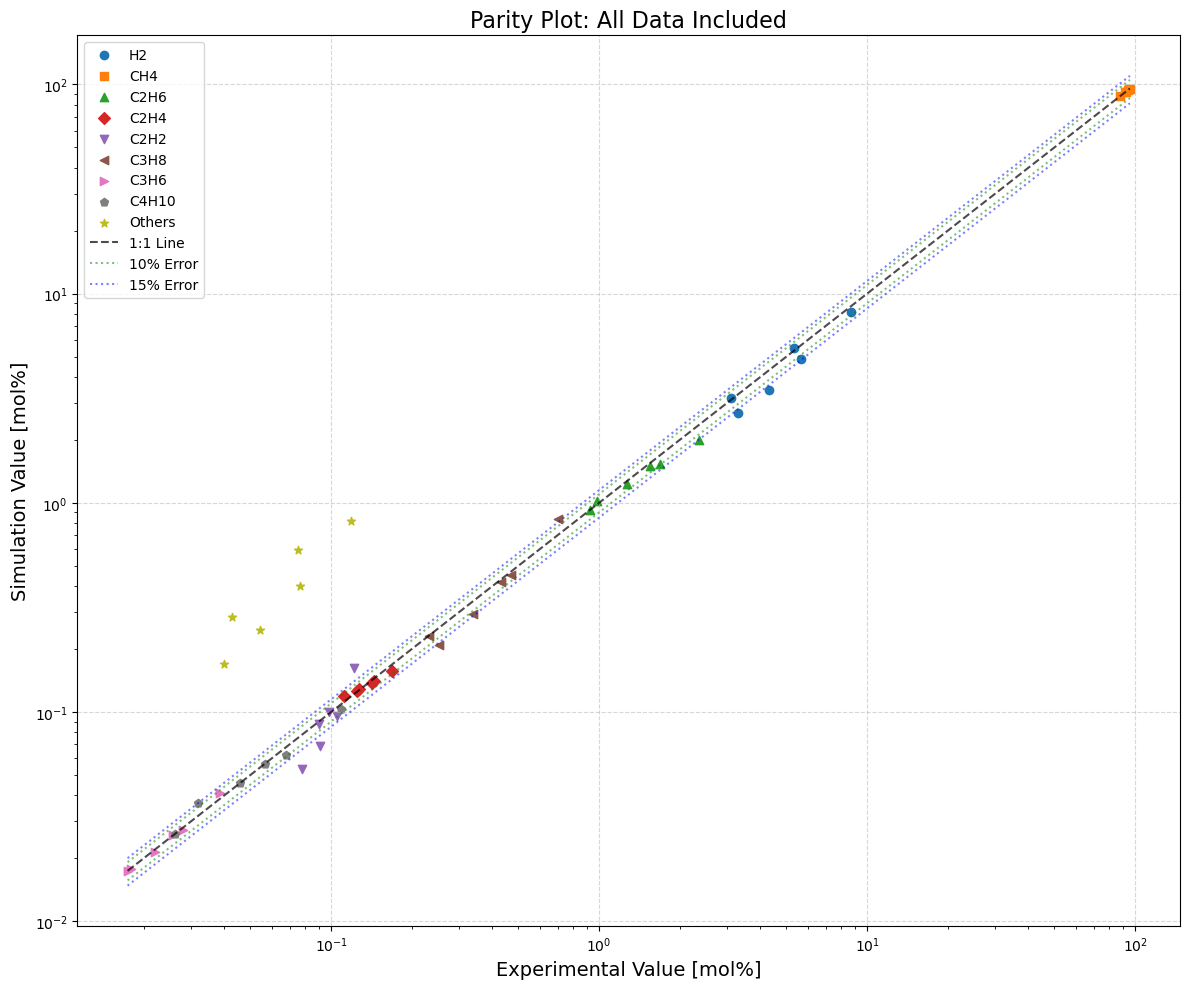

In [5]:
# Create Parity Plot (EXP vs SIM comparison) - 모든 데이터 포함
plt.figure(figsize=(12, 10))

# 모든 데이터를 저장할 리스트
exp_values = []
sim_values = []
component_markers = {}
component_colors = {}

# 각 성분별 마커와 색상 정의
markers = ['o', 's', '^', 'D', 'v', '<', '>', 'p', '*']
colors = plt.cm.tab10.colors

# 모든 데이터 (Time과 Power 변화 모두 포함)를 사용
df_all_data = df_species  # 모든 데이터가 포함된 원본 데이터프레임 사용

# 각 성분별 실험값과 시뮬레이션값 수집
for i, component in enumerate(components):
    # 실험값과 시뮬레이션값 열 이름
    exp_col = f'{component}_exp [mol%]' if component != 'Others' else 'Others _exp[mol%]'
    sim_col = f'{component}_sim [mol%]' if component != 'Others' else 'Others_sim [mol%]'
    
    # 각 성분별 마커와 색상 저장
    component_markers[component] = markers[i % len(markers)]
    component_colors[component] = colors[i % len(colors)]
    
    # 각 성분별 실험값과 시뮬레이션값 추출
    for exp_val, sim_val in zip(df_all_data[exp_col], df_all_data[sim_col]):
        if exp_val > 0 and sim_val > 0:  # 로그 스케일을 위해 양수값만 사용
            exp_values.append(exp_val)
            sim_values.append(sim_val)
            
            # 각 성분을 다른 마커와 색상으로 표시
            plt.scatter(exp_val, sim_val, 
                       marker=component_markers[component], 
                       color=component_colors[component],
                       label=component if component not in plt.gca().get_legend_handles_labels()[1] else "")

# 대각선 (완벽한 일치선) 그리기
max_val = max(max(exp_values), max(sim_values))
min_val = min(min(exp_values), min(sim_values))
plt.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.7, label='1:1 Line')

# 10%, 15%, 20% 오차 선 추가
# 상한선
plt.plot([min_val, max_val], [min_val*1.1, max_val*1.1], 'g:', alpha=0.5, label='10% Error')
plt.plot([min_val, max_val], [min_val*1.15, max_val*1.15], 'b:', alpha=0.5, label='15% Error')

# 하한선
plt.plot([min_val, max_val], [min_val*0.9, max_val*0.9], 'g:', alpha=0.5)
plt.plot([min_val, max_val], [min_val*0.85, max_val*0.85], 'b:', alpha=0.5)

# 로그 스케일 설정
plt.xscale('log')
plt.yscale('log')

# 그래프 설정
plt.title('Parity Plot: All Data Included', fontsize=16)
plt.xlabel('Experimental Value [mol%]', fontsize=14)
plt.ylabel('Simulation Value [mol%]', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# 범례 추가 (중복 제거)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best')

plt.tight_layout()
plt.show()


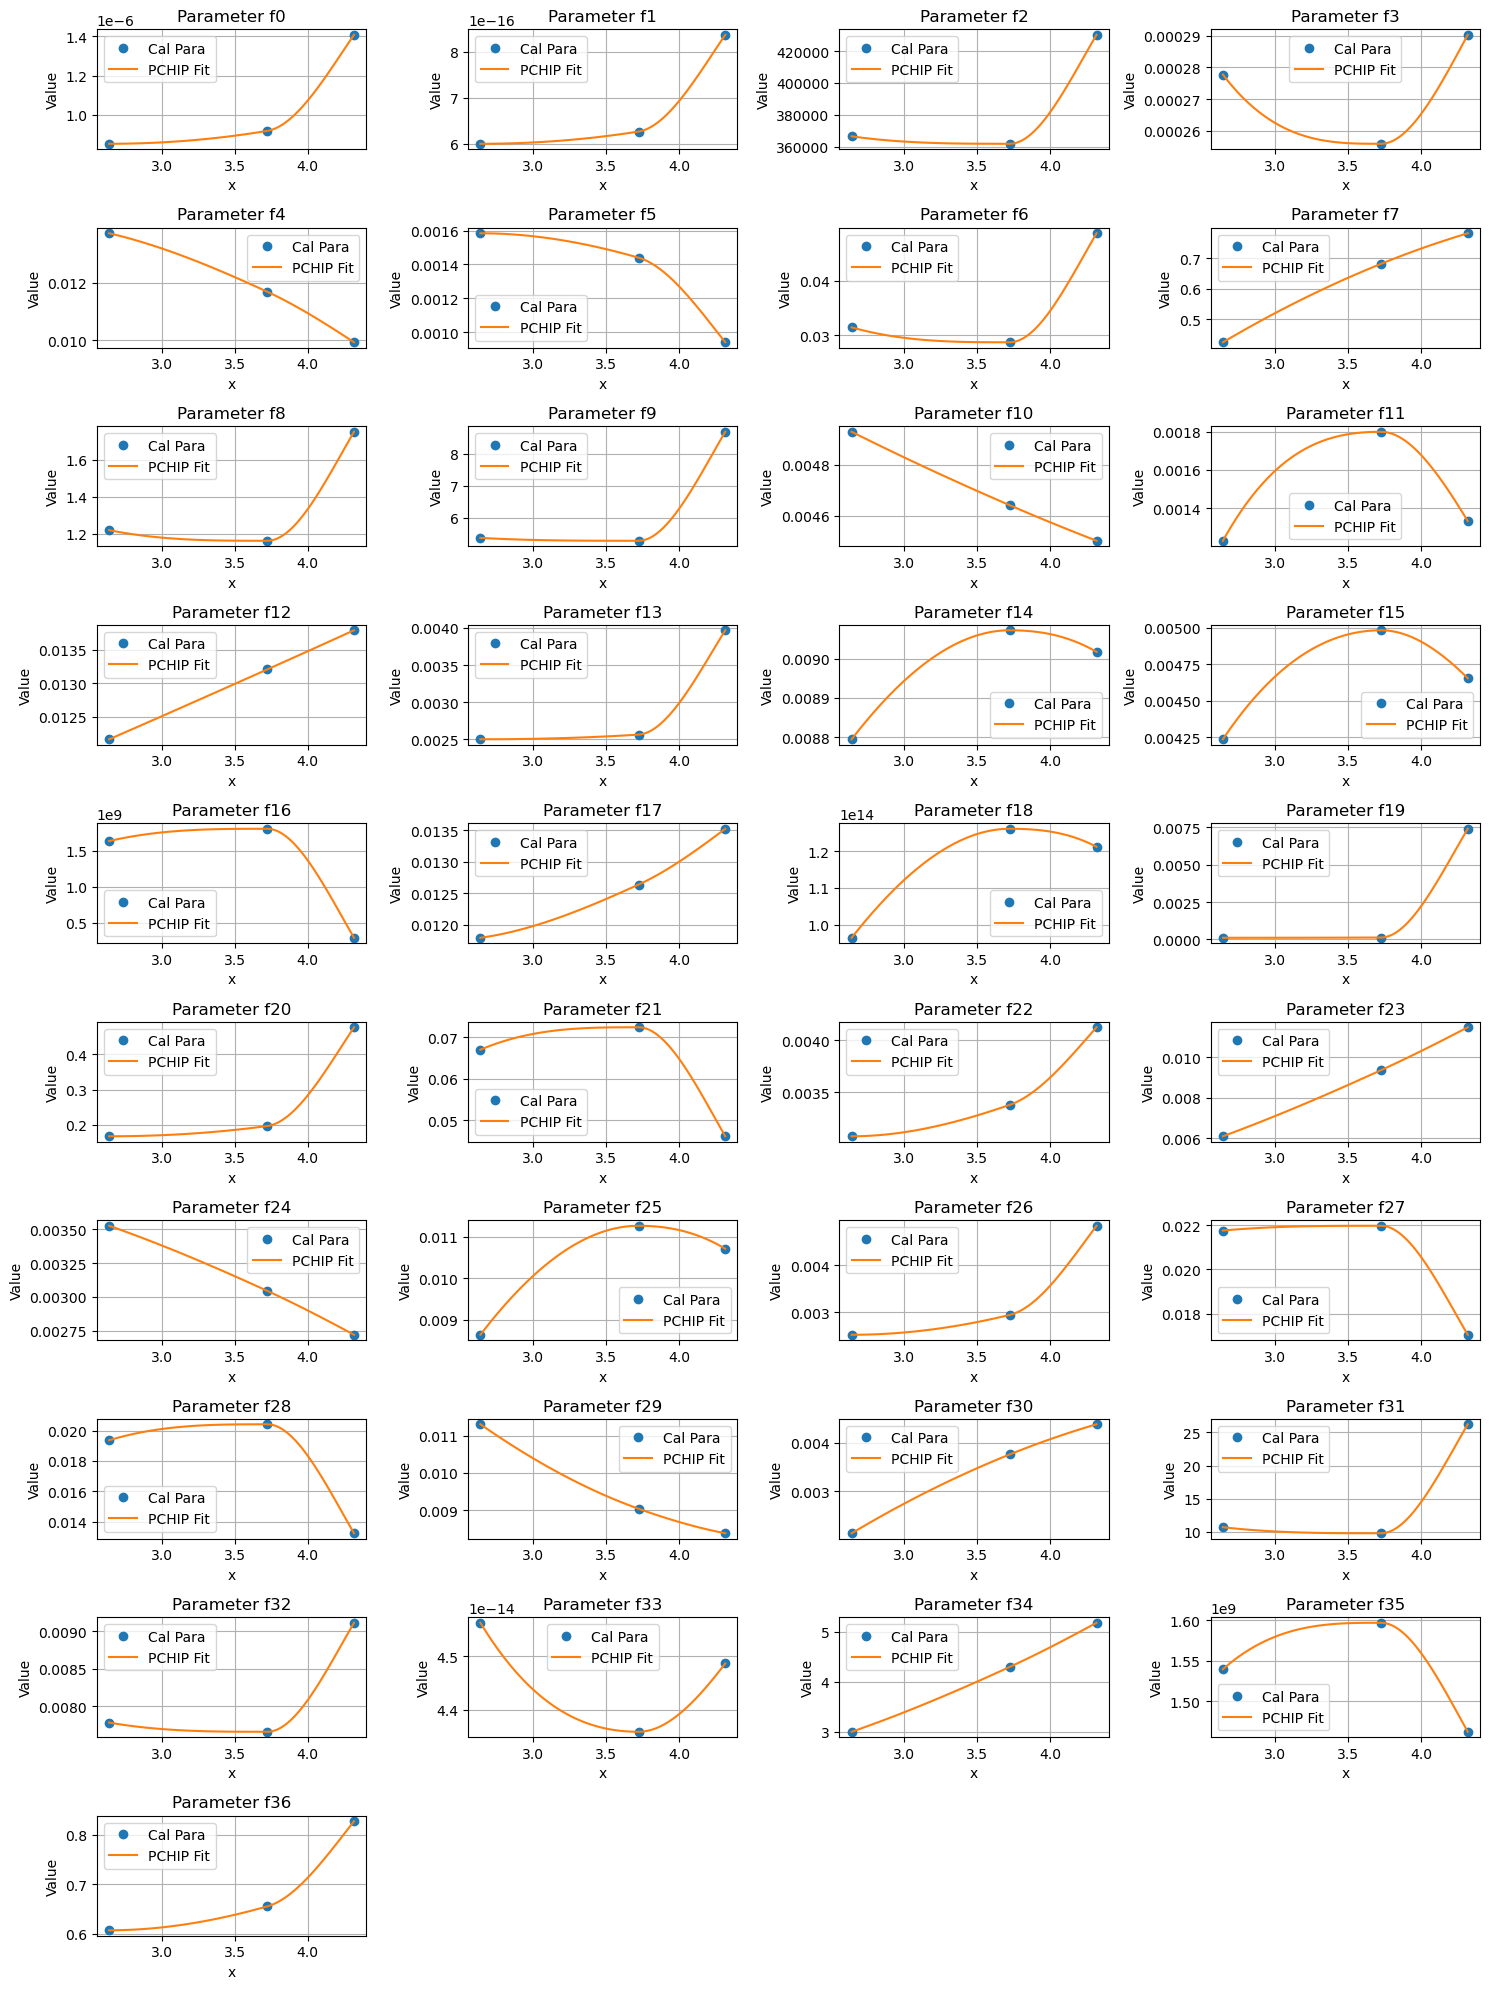

In [6]:
df_para = pd.read_csv('para.csv')
for col in ['10 kV', '12.5 kV', '15 kV']:
    df_para[col] = df_para[col].str.replace('d', 'e').astype(float)

x = [2.64, 3.723, 4.317]
y = df_para[['10 kV', '12.5 kV', '15 kV']].values
from scipy.interpolate import PchipInterpolator
import numpy as np

# 전체 파라미터에 대한 fitting 수행
plt.figure(figsize=(15, 20))
for i in range(len(df_para)):
    # 현재 파라미터 데이터 추출
    param_data = y[i]
    
    # PCHIP 인터폴레이터 생성
    pchip = PchipInterpolator(x, param_data)
    
    # 부드러운 곡선을 위한 x값 생성
    x_new = np.linspace(min(x), max(x), 100)
    
    # fitting 결과 계산
    y_new = pchip(x_new)
    
    # 서브플롯 생성
    plt.subplot(10, 4, i+1)
    plt.plot(x, param_data, 'o', label='Cal Para')
    plt.plot(x_new, y_new, '-', label='PCHIP Fit')
    plt.title(f'Parameter {df_para["para"][i]}')
    plt.xlabel('x')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


In [35]:
df_rxlist = pd.read_csv('df_reaction_list.csv', header=None)
df_rx_15kV = pd.read_csv('df_rate_15kV.csv')
df_rx_12_5kV = pd.read_csv('df_rate_12.5kV.csv')
df_rx_10kV = pd.read_csv('df_rate_10kV.csv')

In [36]:
df_rx_15kV

,Time_s,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.000000,1.570000e+11,1.550000e+11,0.00000,0.00000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000001,1.570000e+11,1.550000e+11,0.00118,0.00119,1.970000e-19,1.880000e-19,3.600000e-34,3.410000e-34,2.65,...,5.400000e-12,9.540000e-28,4.780000e-02,1.060000e-21,4.260000e-36,3.240000e-36,5.040000e-12,3.660000e-26,3.610000e-26,4.340000e-14
2,0.000002,1.680000e+11,1.340000e+11,0.00256,0.00186,3.140000e-14,2.800000e-14,5.900000e-29,4.820000e-29,111.00,...,2.360000e-10,9.840000e-21,8.600000e+02,5.140000e-16,1.960000e-30,1.560000e-30,6.400000e-10,9.620000e-24,8.560000e-24,1.210000e-10
3,0.000003,1.660000e+11,1.290000e+11,0.00384,0.00256,1.160000e-12,1.030000e-12,3.930000e-27,3.140000e-27,243.00,...,9.500000e-10,1.600000e-18,9.080000e+03,3.810000e-14,2.590000e-28,2.090000e-28,1.610000e-09,3.650000e-23,3.110000e-23,6.200000e-10
4,0.000004,1.660000e+11,1.280000e+11,0.00513,0.00332,1.030000e-11,9.100000e-12,5.180000e-26,4.120000e-26,381.00,...,2.220000e-09,3.320000e-17,3.480000e+04,5.070000e-13,5.090000e-27,4.100000e-27,2.540000e-09,7.720000e-23,6.400000e-23,1.540000e-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
703,29.100000,1.320000e+11,1.010000e+11,30000.00000,17800.00000,5.340000e+09,4.720000e+09,7.090000e+02,5.640000e+02,81900000.00,...,1.720000e-08,1.560000e+10,2.160000e+15,5.730000e+15,1.340000e+09,1.080000e+09,3.240000e-01,7.230000e-08,5.530000e-08,8.080000e-06
704,29.300000,1.320000e+11,1.010000e+11,30100.00000,17900.00000,5.340000e+09,4.720000e+09,7.140000e+02,5.680000e+02,82000000.00,...,1.720000e-08,1.550000e+10,2.160000e+15,5.730000e+15,1.350000e+09,1.090000e+09,3.200000e-01,7.190000e-08,5.510000e-08,8.040000e-06
705,29.500000,1.320000e+11,1.010000e+11,30300.00000,18000.00000,5.350000e+09,4.730000e+09,7.180000e+02,5.710000e+02,82000000.00,...,1.730000e-08,1.540000e+10,2.160000e+15,5.740000e+15,1.360000e+09,1.100000e+09,3.210000e-01,7.270000e-08,5.560000e-08,8.010000e-06
706,29.700000,1.320000e+11,1.010000e+11,30400.00000,18100.00000,5.350000e+09,4.730000e+09,7.230000e+02,5.740000e+02,82100000.00,...,1.730000e-08,1.530000e+10,2.160000e+15,5.750000e+15,1.370000e+09,1.110000e+09,3.240000e-01,7.380000e-08,5.650000e-08,7.980000e-06


In [41]:
# 25번 이하의 반응 제거 및 같은 반응 합치기
# 15kV 데이터 처리
df_filtered_15kV = df_rx_15kV.copy()

# 12.5kV 데이터 처리
df_filtered_12_5kV = df_rx_12_5kV.copy()

# 10kV 데이터 처리
df_filtered_10kV = df_rx_10kV.copy()

# 모든 데이터프레임에서 숫자 열을 숫자형으로 변환
for df in [df_filtered_15kV, df_filtered_12_5kV, df_filtered_10kV]:
    for col in df.columns:
        if col != 'Time_s':  # Time_s 열은 건너뛰기
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
            except:
                print(f"열 '{col}'을 숫자로 변환할 수 없습니다.")

# 합칠 반응 그룹 정의
reaction_groups = [
    [26, 27, 28],
    [29, 30, 31],
    [32, 33, 34],
    [35, 36, 37, 38],
    [39, 40, 41],
    [42, 43],
    [51, 52, 53],
    [54, 55, 56],
    [57, 58, 59],
    [61, 62, 63],
    [65, 66],
    [68, 69, 70],
    [71, 72, 73],
    [74, 75, 76],
    [80, 81, 82],
    [83, 84, 85],
    [91, 92, 93],
    [96, 97],
    [100, 101, 102],
    [103, 104, 105],
    [108, 109, 110],
    [111, 112, 113]
]

# 각 데이터프레임에 대해 처리 수행
for df_filtered in [df_filtered_15kV, df_filtered_12_5kV, df_filtered_10kV]:
    # 각 그룹의 반응을 합치고 대표 번호만 남기기
    for group in reaction_groups:
        main_col = str(group[0])
        if main_col in df_filtered.columns:  # 메인 열이 있는지 확인
            for col in group[1:]:
                col_str = str(col)
                if col_str in df_filtered.columns:
                    # NaN 값을 0으로 대체하여 덧셈 수행
                    df_filtered[main_col] = df_filtered[main_col].fillna(0) + df_filtered[col_str].fillna(0)
            
            # 그룹의 다른 열들 삭제
            for col in group[1:]:
                col_str = str(col)
                if col_str in df_filtered.columns:
                    df_filtered = df_filtered.drop(columns=[col_str])

# 25번 이하의 반응 제거 및 필요한 열만 유지 (존재하는 열만 선택)
cols_to_remove = sum([group[1:] for group in reaction_groups], [])
cols_to_keep = ['Time_s']

# 26번 이상의 열 중 삭제할 열이 아닌 것만 추가
for i in range(26, 115):
    if i not in cols_to_remove:
        col_str = str(i)
        # 열이 데이터프레임에 존재하는 경우에만 추가
        if col_str in df_filtered_15kV.columns:
            cols_to_keep.append(col_str)

# 존재하는 열만 선택
df_rx_15kV = df_filtered_15kV[cols_to_keep]
df_rx_12_5kV = df_filtered_12_5kV[cols_to_keep]
df_rx_10kV = df_filtered_10kV[cols_to_keep]

df_rx_10kV

,Time_s,26,29,32,35,39,42,44,45,46,...,96,98,99,100,103,106,107,108,111,114
0,0.000000,1.990000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.370000e-02,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000001,1.990000,2.920000e-32,7.000000e-11,6.310000e-23,3.440000e-37,1.440000e-33,1.260000e-27,4.890000e-16,1.420000e-46,...,2.060000e-08,1.930000e-36,1.590000e-30,5.460000e-31,5.720000e-34,1.310000e-12,9.850000e-32,2.050000e-03,9.140000e-38,7.720000e-27
2,0.000002,81.400000,1.500000e-25,8.940000e-08,1.120000e-18,4.400000e-31,1.160000e-28,2.050000e-24,8.210000e-13,1.360000e-38,...,2.140000e-16,4.560000e-22,4.590000e-24,1.480000e-13,9.380000e+04,1.780000e-24,5.660000e+01,3.550000e-17,2.390000e-10,1.250000e-11
3,0.000003,98.300000,6.360000e-24,2.370000e-07,6.140000e-18,1.740000e-29,2.320000e-27,5.760000e-24,1.200000e-12,1.210000e-36,...,8.080000e-15,1.360000e-19,6.700000e-22,5.350000e-12,2.080000e+05,2.660000e-22,5.730000e+02,2.490000e-15,5.740000e-10,6.160000e-11
4,0.000004,101.000000,5.670000e-23,3.800000e-07,1.510000e-17,1.510000e-28,1.310000e-26,9.160000e-24,1.260000e-12,1.630000e-35,...,6.970000e-14,4.300000e-18,1.340000e-20,4.680000e-11,3.270000e+05,5.370000e-21,2.160000e+03,3.240000e-14,8.940000e-10,1.520000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,29.100000,93.100023,4.420000e-01,2.010000e-01,3.430000e-01,1.450000e-01,4.870000e-02,2.680000e-16,1.250000e-12,4.850000e-06,...,3.470000e+13,6.230000e+15,3.470000e+13,6.310000e+01,3.000000e+01,1.560000e+08,1.630000e+15,3.170000e+15,2.440000e-02,2.710000e-06
725,29.300000,93.100023,4.430000e-01,2.020000e-01,3.460000e-01,1.460000e-01,4.920000e-02,2.670000e-16,1.250000e-12,4.910000e-06,...,3.500000e+13,6.250000e+15,3.500000e+13,6.310000e+01,3.000000e+01,1.560000e+08,1.630000e+15,3.170000e+15,2.430000e-02,2.700000e-06
726,29.500000,93.000023,4.440000e-01,2.020000e-01,3.490000e-01,1.470000e-01,4.980000e-02,2.670000e-16,1.250000e-12,4.960000e-06,...,3.530000e+13,6.260000e+15,3.530000e+13,6.300000e+01,3.000000e+01,1.560000e+08,1.630000e+15,3.180000e+15,2.430000e-02,2.690000e-06
727,29.700000,93.000024,4.460000e-01,2.030000e-01,3.520000e-01,1.470000e-01,5.030000e-02,2.670000e-16,1.250000e-12,5.010000e-06,...,3.560000e+13,6.270000e+15,3.560000e+13,6.300000e+01,2.990000e+01,1.550000e+08,1.640000e+15,3.180000e+15,2.430000e-02,2.670000e-06


C:\Users\USER\AppData\Local\Temp\ipykernel_29960\4201555717.py:81: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.1, wspace=0.1)


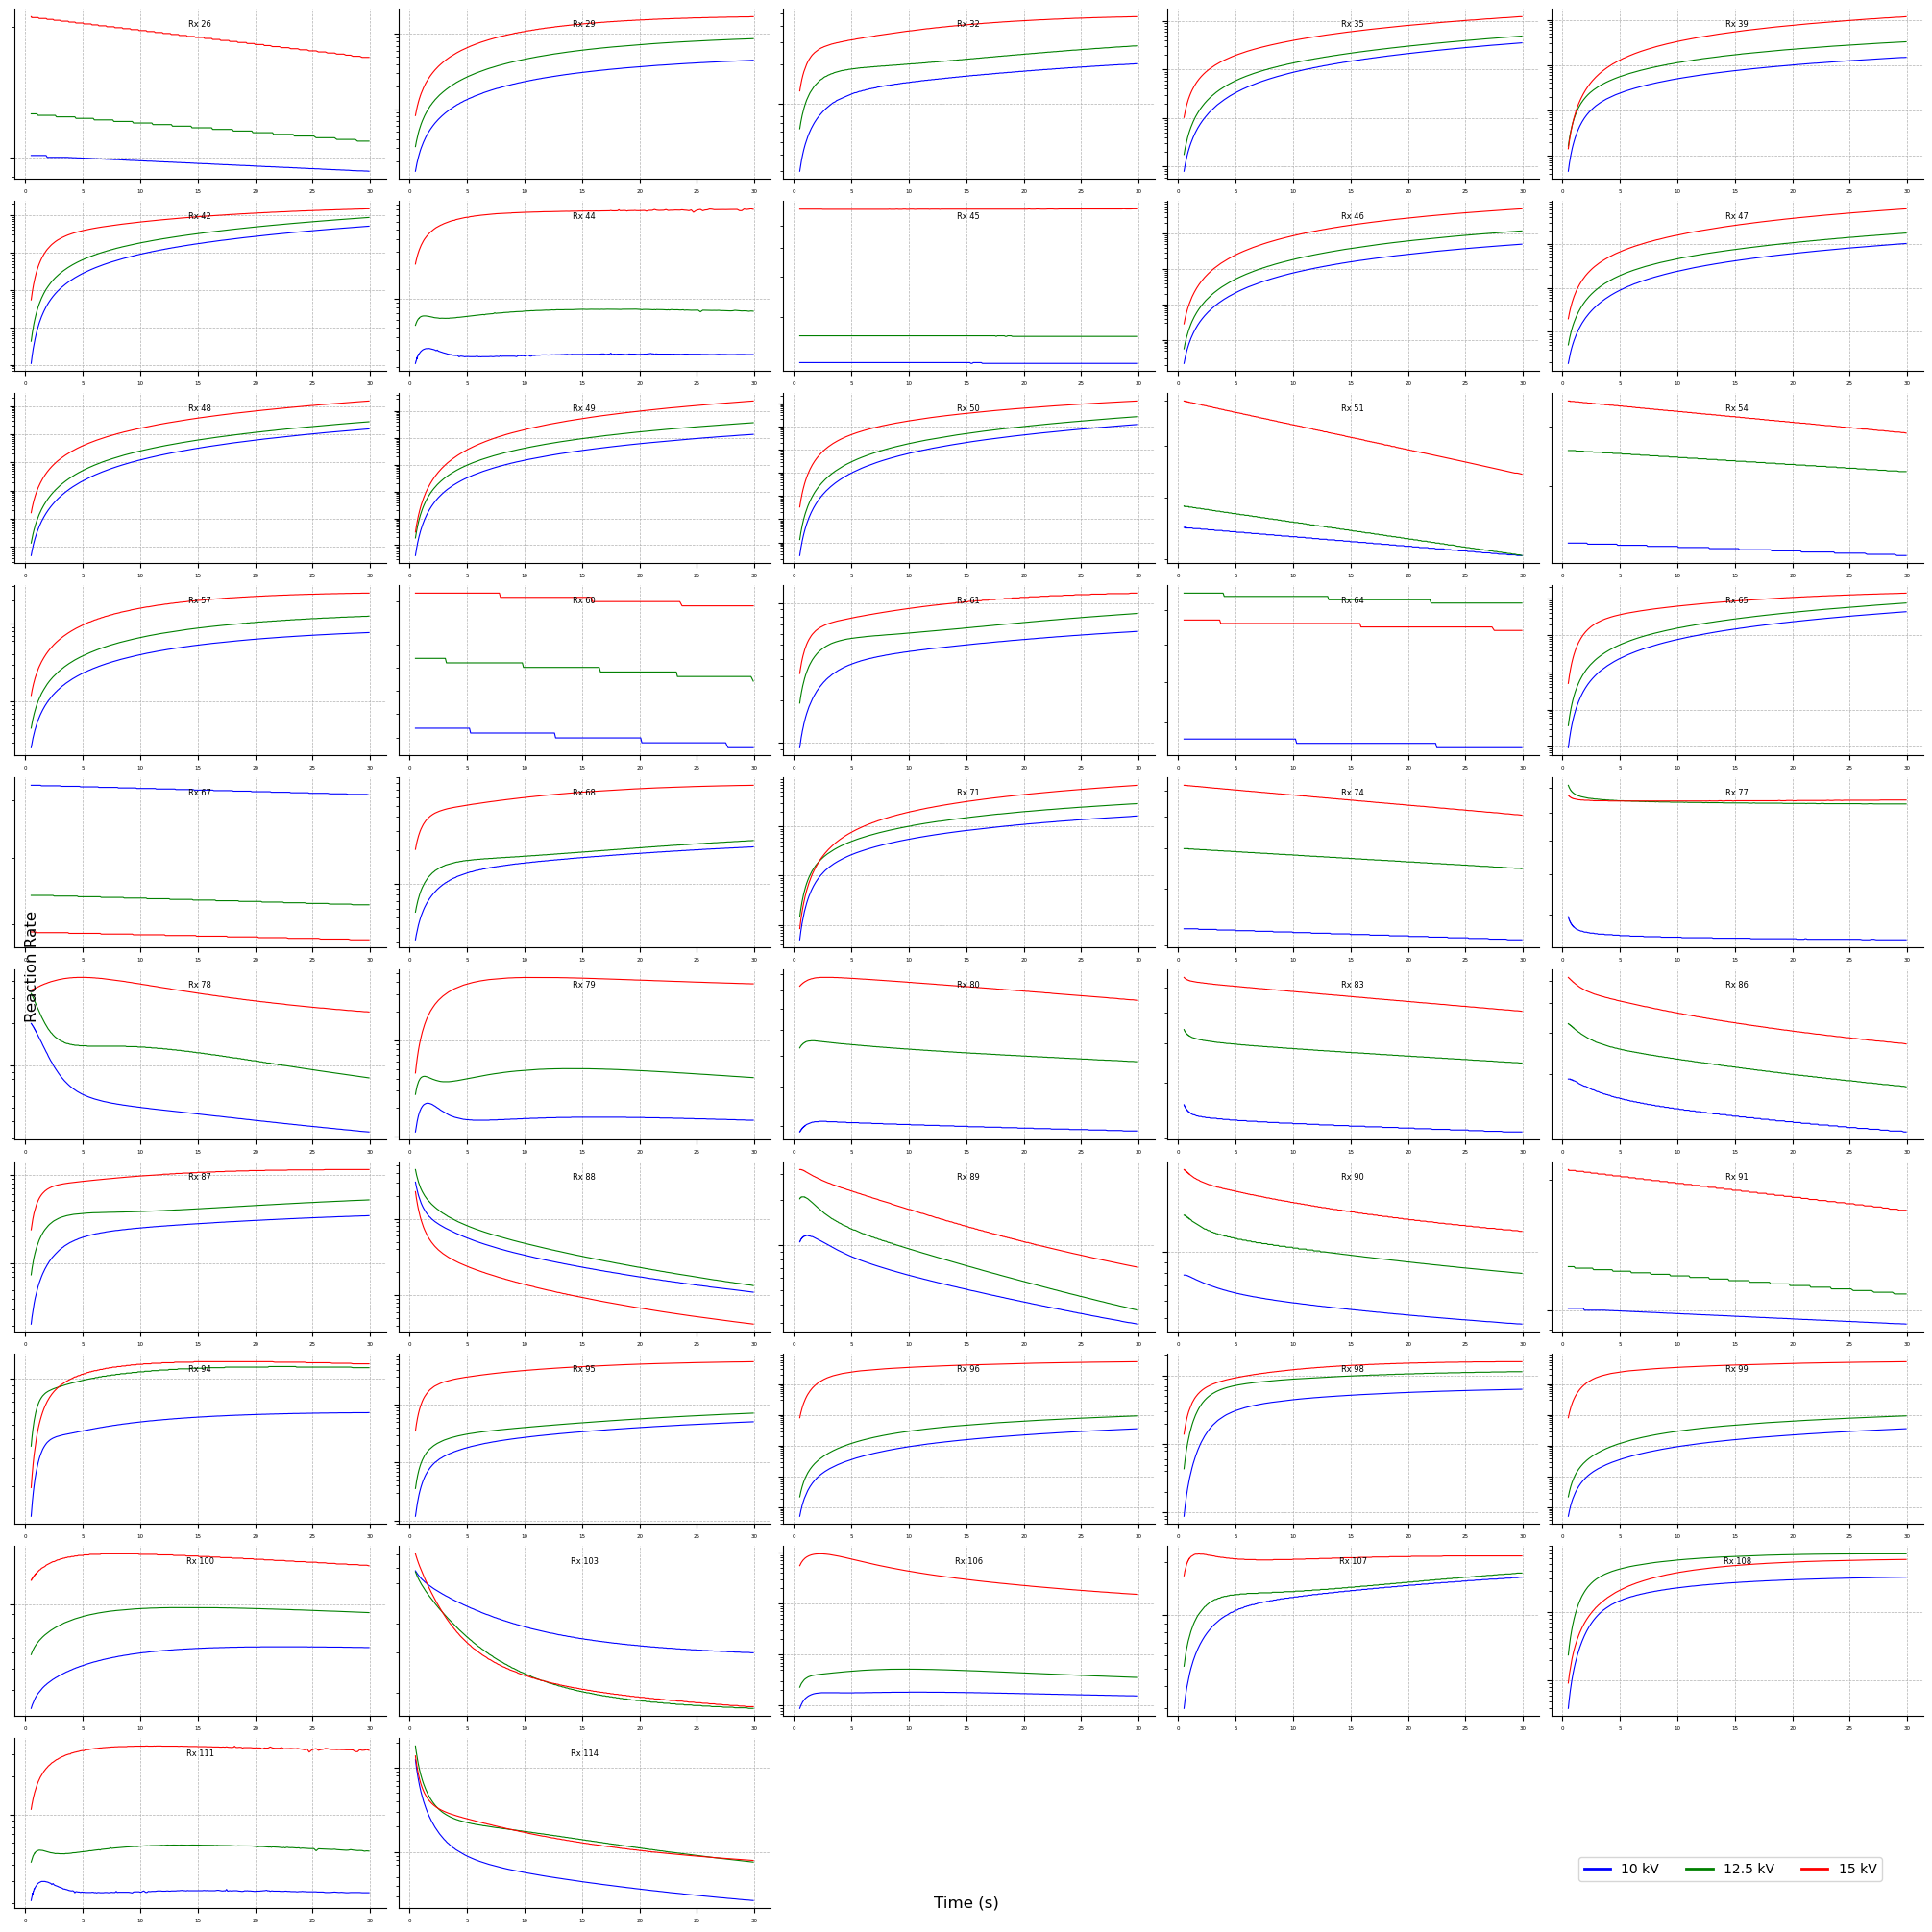

In [42]:
# 반응식 별로 kV에 따른 변화를 시각화
import matplotlib.pyplot as plt
import numpy as np

# 반응식 목록 불러오기
with open('df_reaction_list.csv', 'r') as f:
    reactions_list = f.readlines()
reactions_list = [line.strip().split(',')[1] for line in reactions_list if line.strip()]

# 데이터프레임 준비
dfs = [df_rx_10kV, df_rx_12_5kV, df_rx_15kV]
kv_labels = ['10 kV', '12.5 kV', '15 kV']
colors = ['b', 'g', 'r']  # 각 kV별 색상

# 필터링된 데이터프레임의 열 이름 가져오기 (Time_s 제외)
reaction_cols = [col for col in df_rx_15kV.columns if col != 'Time_s']
total_reactions = len(reaction_cols)

# 그래프 레이아웃 설정
cols = 5  # 열 수를 10개로 설정
rows = (total_reactions + cols - 1) // cols  # 필요한 행 수 계산

# 그래프 생성
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 2), constrained_layout=True)
axes = axes.flatten()

for idx, col in enumerate(reaction_cols):
    ax = axes[idx]
    reaction_num = int(col)  # 열 이름을 정수로 변환
    
    # 각 kV에 대해 해당 반응식의 데이터 플롯
    for j, (df, label, color) in enumerate(zip(dfs, kv_labels, colors)):
        if col in df.columns:
            time = df['Time_s'].values
            # 0.1초 이후의 데이터만 필터링
            mask = time >= 0.5
            ax.plot(time[mask], df[col][mask], color=color, linewidth=0.8)
    
    # 제목 설정 - 반응 번호 표시
    ax.set_title(f'Rx {reaction_num}', fontsize=6, y=0.85, loc='center')
    
    # 축 설정
    ax.tick_params(axis='both', which='major', labelsize=5)
    ax.set_yscale('log')
    ax.grid(True, linestyle='--', linewidth=0.5)
    
    # y축 레이블 제거
    ax.tick_params(axis='y', which='both', left=True, labelleft=False)
    ax.set_yticklabels([])
    
    # x축 설정
    ax.tick_params(axis='x', which='both', bottom=True, labelsize=4)
    
    # 테두리 설정
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 과학적 표기법 숫자 제거
    ax.yaxis.offsetText.set_visible(False)
    
    # 불필요한 텍스트 제거
    for text in ax.texts:
        if text != ax.title:
            text.set_visible(False)

# 남은 subplot 숨기기
for j in range(total_reactions, len(axes)):
    axes[j].axis('off')

# 전체 그림에 대한 범례 추가
handles = [plt.Line2D([0], [0], color=color, lw=2, label=label) 
           for color, label in zip(colors, kv_labels)]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.02), 
           ncol=3, fontsize=10)

# 전체 그림에 대한 x축과 y축 레이블 추가
fig.text(0.5, 0.01, 'Time (s)', ha='center', fontsize=12)
fig.text(0.01, 0.5, 'Reaction Rate', va='center', rotation='vertical', fontsize=12)

# 서브플롯 간 간격 조정
plt.subplots_adjust(top=0.95, bottom=0.05, hspace=0.1, wspace=0.1)

# 불필요한 텍스트 제거
for ax in fig.axes:
    for txt in ax.texts:
        if txt != ax.title:
            txt.set_visible(False)

plt.show()

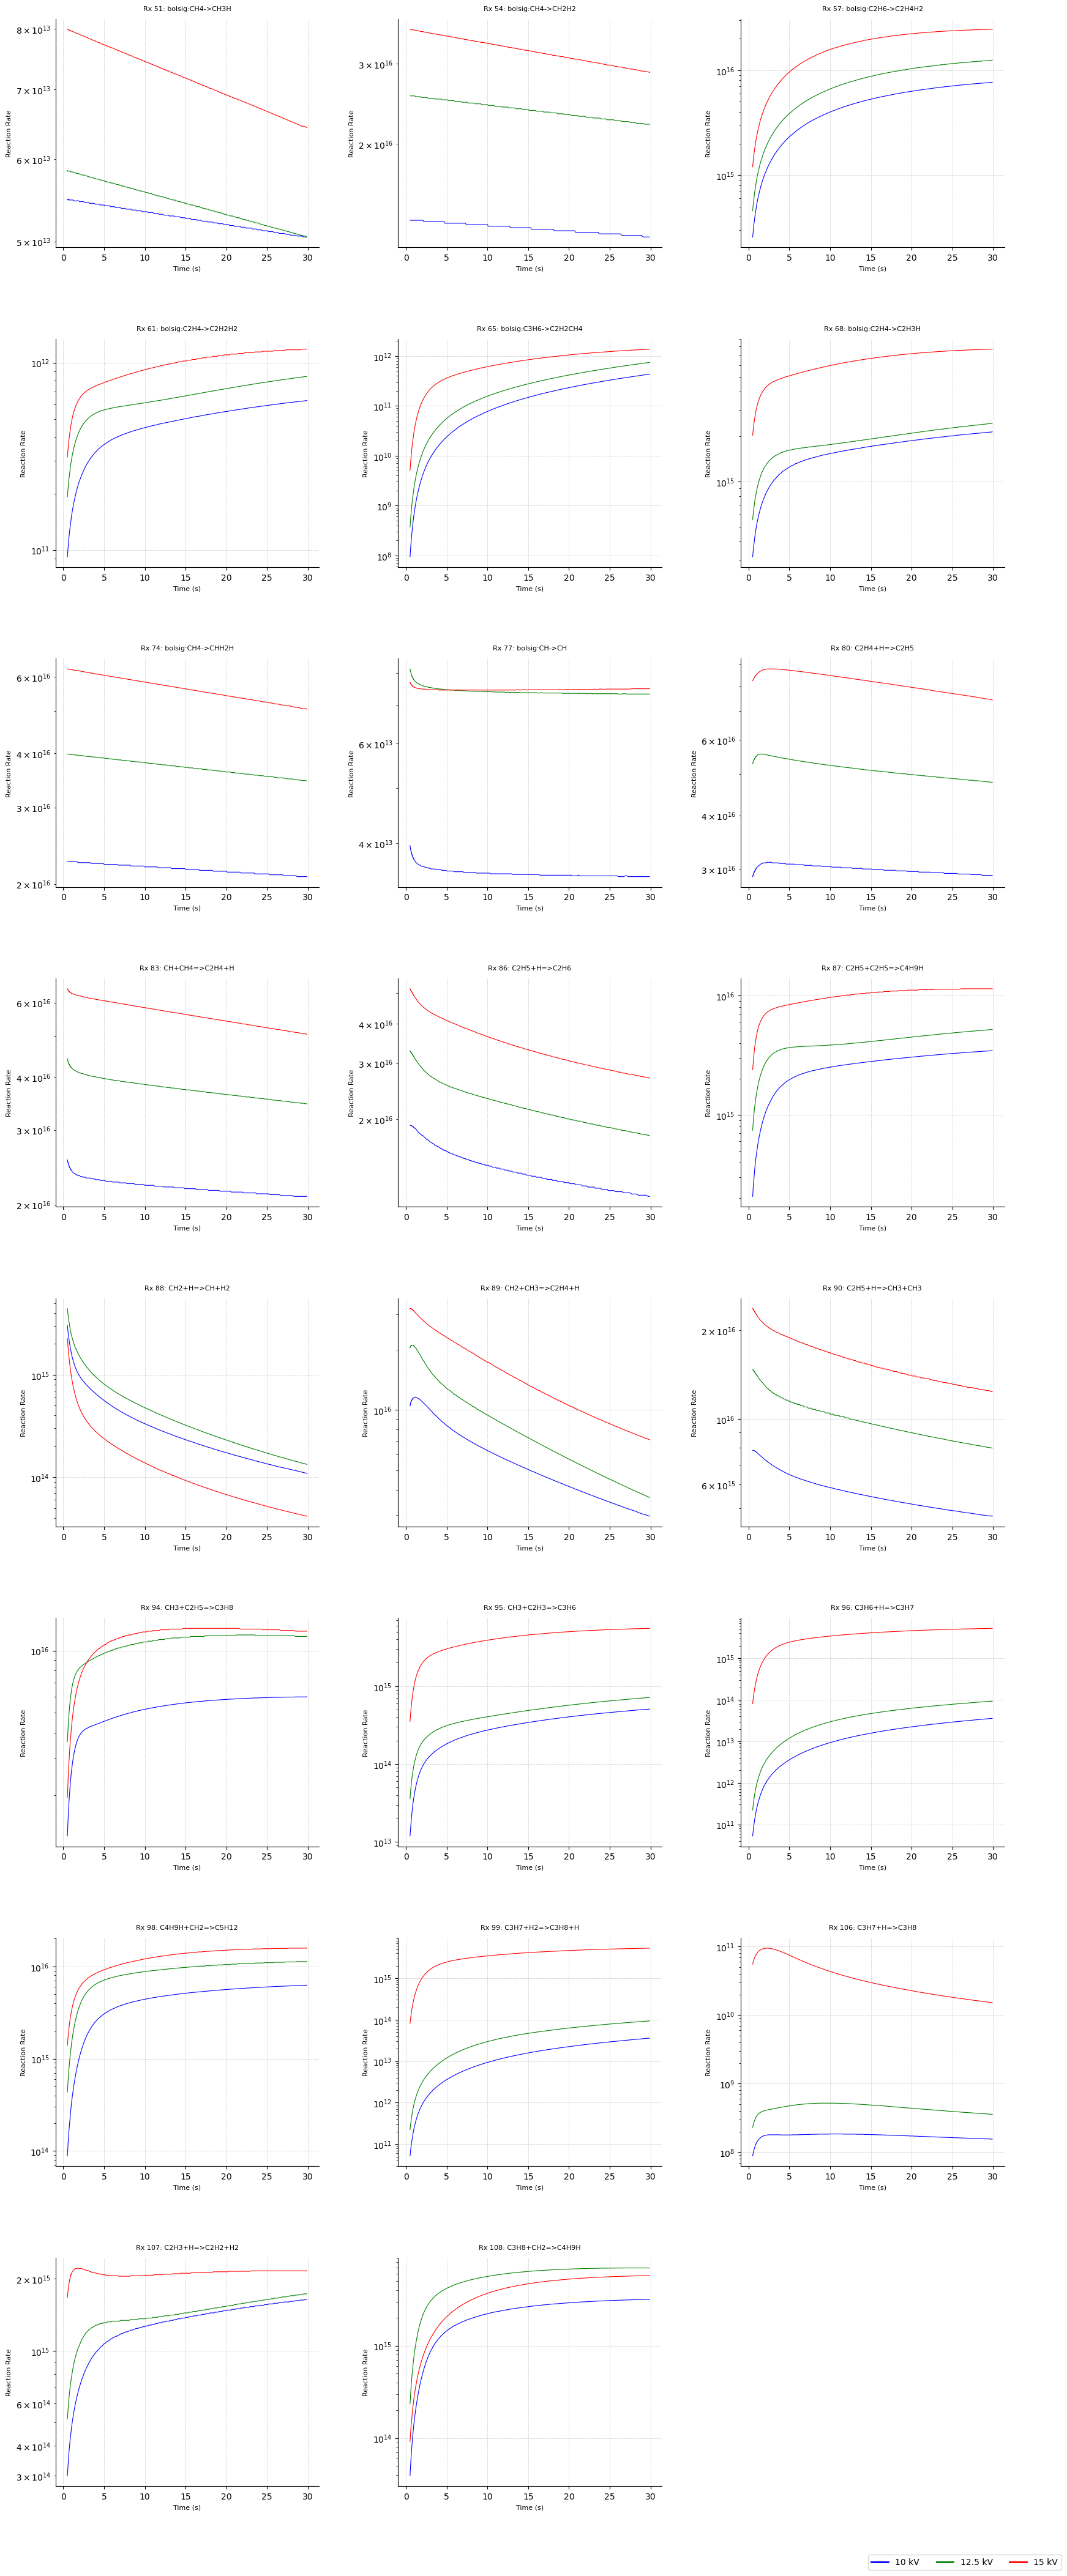

In [43]:
# 반응식 별로 kV에 따른 변화를 시각화
import matplotlib.pyplot as plt
import numpy as np

# 반응식 목록 불러오기
with open('df_reaction_list.csv', 'r') as f:
    reactions_list = f.readlines()
reactions_list = [line.strip().split(',')[1] for line in reactions_list if line.strip()]

# 데이터프레임 준비
dfs = [df_rx_10kV, df_rx_12_5kV, df_rx_15kV]
kv_labels = ['10 kV', '12.5 kV', '15 kV']
colors = ['b', 'g', 'r']  # 각 kV별 색상

# 필터링된 데이터프레임의 열 이름 가져오기 (Time_s 제외)
reaction_cols = [col for col in df_rx_15kV.columns if col != 'Time_s']

# 1e13 이상의 값을 가진 반응만 필터링
filtered_cols = []
for col in reaction_cols:
    max_values = []
    for df in dfs:
        if col in df.columns:
            # 0.5초 이후 데이터만 고려
            mask = df['Time_s'] >= 0.5
            if any(df[col][mask] >= 1e10):
                max_values.append(True)
            else:
                max_values.append(False)
    # 하나 이상의 kV 조건에서 1e13 이상의 값이 있으면 포함
    if any(max_values):
        filtered_cols.append(col)

total_reactions = len(filtered_cols)

# 그래프 레이아웃 설정
cols = 3  # 열 수를 5개로 설정
rows = (total_reactions + cols - 1) // cols  # 필요한 행 수 계산

# 그래프 생성
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 6), constrained_layout=False)
axes = axes.flatten()

for idx, col in enumerate(filtered_cols):
    ax = axes[idx]
    reaction_num = int(col)  # 열 이름을 정수로 변환
    
    # 반응식 가져오기 (인덱스는 0부터 시작하므로 -1)
    reaction_text = reactions_list[reaction_num-1] if reaction_num <= len(reactions_list) else f"Reaction {reaction_num}"
    
    # 각 kV에 대해 해당 반응식의 데이터 플롯
    for j, (df, label, color) in enumerate(zip(dfs, kv_labels, colors)):
        if col in df.columns:
            time = df['Time_s'].values
            # 0.5초 이후의 데이터만 필터링
            mask = time >= 0.5
            values = df[col][mask].values
            ax.plot(time[mask], values, color=color, linewidth=0.8)
    
    # 제목 설정 - 반응 번호와 반응식 표시 (위치 조정)
    ax.set_title(f'Rx {reaction_num}: {reaction_text}', fontsize=8, y=1.0, pad=10)
    
    # 축 설정 - 기본적인 로그 스케일만 적용
    ax.set_yscale('log')
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # 테두리 설정
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # 각 서브플롯에 x와 y 레이블 추가
    ax.set_xlabel('Time (s)', fontsize=8)
    ax.set_ylabel('Reaction Rate', fontsize=8)

# 남은 subplot 숨기기
for j in range(total_reactions, len(axes)):
    axes[j].axis('off')

# 전체 그림에 대한 범례 추가
handles = [plt.Line2D([0], [0], color=color, lw=2, label=label) 
           for color, label in zip(colors, kv_labels)]
fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.95, 0.05), 
           ncol=3, fontsize=10)

# 서브플롯 간 간격 조정 (여백 추가)
plt.subplots_adjust(top=0.92, bottom=0.08, hspace=0.4, wspace=0.3)

plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_29960\1299272570.py:92: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


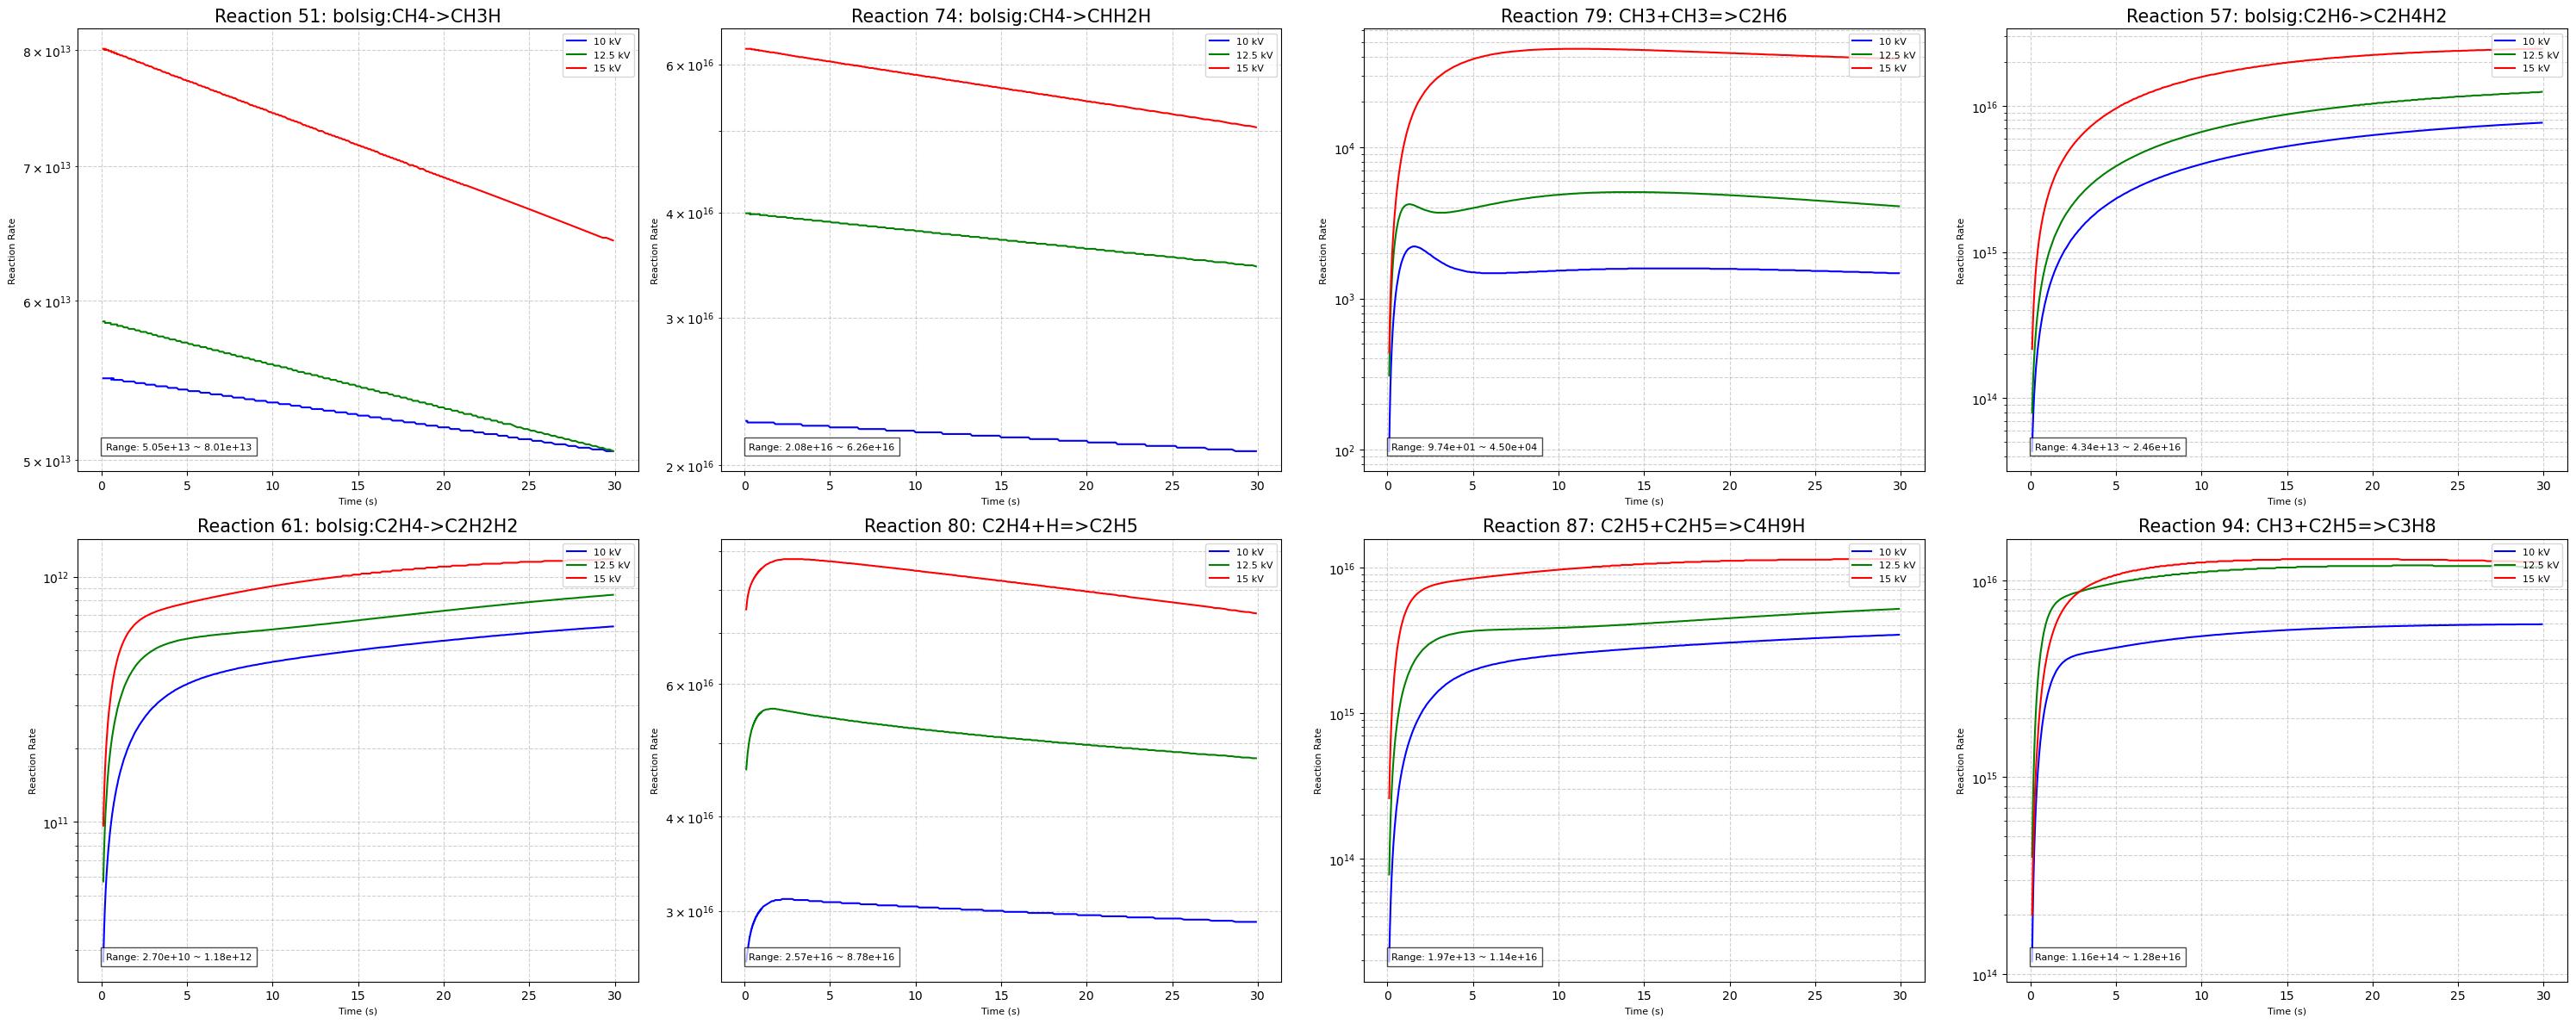

In [46]:
# 선택된 반응 번호들
selected_reactions = [51, 74, 79,57, 61, 80, 87,94]

# 데이터프레임 준비
dfs = [df_rx_10kV, df_rx_12_5kV, df_rx_15kV]
kv_labels = ['10 kV', '12.5 kV', '15 kV']
colors = ['b', 'g', 'r']  # 각 kV별 색상

# 행과 열 계산
cols = 4  # 열 수를 4개로 설정
rows = (len(selected_reactions) + cols - 1) // cols  # 필요한 행 수 계산 (올림)

# 선택된 반응들에 대한 그래프 생성 - 4열 레이아웃
fig, axes = plt.subplots(rows, cols, figsize=(30, 6*rows), constrained_layout=True)
axes = axes.flatten()  # 2D 배열을 1D로 변환

for i, rx_num in enumerate(selected_reactions):
    ax = axes[i]
    
    # 반응 번호에 해당하는 인덱스 (0부터 시작)
    rx_idx = rx_num - 1
    
    # y축 값 범위 추적을 위한 변수
    y_min, y_max = float('inf'), float('-inf')
    
    # 각 kV 조건에 대해 그래프 그리기
    for j, (df, label, color) in enumerate(zip(dfs, kv_labels, colors)):
        try:
            # 시간 데이터 확인
            if 'Time_s' in df.columns:
                time = df['Time_s']
            elif 'time' in df.columns:
                time = df['time']
            else:
                continue
            
            # 반응 번호에 해당하는 열 이름 (문자열로 변환)
            col = str(rx_num)
            
            # 해당 열이 존재하는지 확인
            if col in df.columns:
                # 0.1초 이후의 데이터만 필터링
                mask = time >= 0.1
                ax.plot(time[mask], df[col][mask], color=color, label=label)
                
                # y축 범위 업데이트
                if len(df[col][mask]) > 0:
                    y_min = min(y_min, df[col][mask].min())
                    y_max = max(y_max, df[col][mask].max())
        except Exception as e:
            print(f"Error plotting reaction {rx_num}: {e}")
            continue
    
    # 반응 이름 가져오기 (df_rxlist에서)
    try:
        reaction_name = df_rxlist.iloc[rx_idx, 1] if df_rxlist.shape[1] > 1 else f"Reaction {rx_num}"
        ax.set_title(f"Reaction {rx_num}: {reaction_name}", fontsize=15)  # 폰트 사이즈를 3배로 키움 (10 -> 30)
    except:
        ax.set_title(f"Reaction {rx_num}", fontsize=10)  # 폰트 사이즈를 3배로 키움 (10 -> 30)
    
    # 축 스케일 설정 (로그 스케일)
    ax.set_yscale('log')
    # x축은 일반 선형 스케일 사용
    ax.set_xscale('linear')
    
    # y축 범위 표시
    if y_min != float('inf') and y_max != float('-inf'):
        y_range_text = f"Range: {y_min:.2e} ~ {y_max:.2e}"
        ax.text(0.05, 0.05, y_range_text, transform=ax.transAxes, fontsize=8, 
                bbox=dict(facecolor='white', alpha=0.7))
    
    # 축 레이블 추가
    ax.set_xlabel('Time (s)', fontsize=8)
    ax.set_ylabel('Reaction Rate', fontsize=8)
    
    # 그리드 추가
    ax.grid(True, which='both', linestyle='--', alpha=0.6)
    
    # 각 서브플롯에 범례 추가
    ax.legend(fontsize=8, loc='upper right')

# 사용하지 않는 서브플롯 숨기기
for i in range(len(selected_reactions), len(axes)):
    axes[i].axis('off')

# 전체 그림에 대한 범례는 제거 (각 서브플롯에 개별 범례가 있으므로)
# handles = [plt.Line2D([0], [0], color=color, lw=2, label=label) 
#            for color, label in zip(colors, kv_labels)]
# fig.legend(handles=handles, loc='lower right', bbox_to_anchor=(0.98, 0.02), 
#            ncol=3, fontsize=12)

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd
import re

# 파일에서 데이터 불러오기 (이미 제공된 정보로 가정)
# df_rxlist = pd.read_csv('df_reaction_list.csv')

# 반응식에서 진동 여기 상태 표기((V) 또는 (V숫자))를 제거하는 함수
def remove_vibrational_states(reaction):
    # (V) 또는 (V+숫자) 패턴 제거
    cleaned = re.sub(r'\(V\d*\)', '', reaction)
    return cleaned

# 각 반응식에서 진동 여기 상태 표기 제거
df_rxlist['cleaned_reaction'] = df_rxlist.iloc[:, 1].apply(remove_vibrational_states)

# 동일한 클린 반응식끼리 그룹화
reaction_groups = {}
for index, row in df_rxlist.iterrows():
    clean_rx = row['cleaned_reaction']
    rx_num = row.iloc[0]  # 반응 번호
    orig_rx = row.iloc[1]  # 원래 반응식
    
    if clean_rx in reaction_groups:
        reaction_groups[clean_rx].append((rx_num, orig_rx))
    else:
        reaction_groups[clean_rx] = [(rx_num, orig_rx)]

# 2개 이상의 반응이 포함된 그룹만 출력
vibrational_groups = {k: v for k, v in reaction_groups.items() if len(v) > 1}

# 결과 출력
print("진동 여기 상태를 제거했을 때 동일한 반응들:")
for clean_rx, reactions in vibrational_groups.items():
    rx_nums = [str(rx[0]) for rx in reactions]
    print(f"\n동일한 반응: {clean_rx}")
    print(f"반응 번호: {', '.join(rx_nums)}")
    print("원래 반응식:")
    for rx in reactions:
        print(f"  - 반응 {rx[0]}: {rx[1]}")

진동 여기 상태를 제거했을 때 동일한 반응들:

동일한 반응: bolsig:CH4->CH4
반응 번호: 1, 2, 3, 4
원래 반응식:
  - 반응 1: bolsig:CH4->CH4(V24)
  - 반응 2: bolsig:CH4->CH4(V13)
  - 반응 3: bolsig:CH4(V24)->CH4
  - 반응 4: bolsig:CH4(V13)->CH4

동일한 반응: bolsig:C2H6->C2H6
반응 번호: 5, 6, 7, 8
원래 반응식:
  - 반응 5: bolsig:C2H6->C2H6(V24)
  - 반응 6: bolsig:C2H6->C2H6(V13)
  - 반응 7: bolsig:C2H6(V24)->C2H6
  - 반응 8: bolsig:C2H6(V13)->C2H6

동일한 반응: bolsig:C2H4->C2H4
반응 번호: 9, 10, 11, 12
원래 반응식:
  - 반응 9: bolsig:C2H4->C2H4(V2)
  - 반응 10: bolsig:C2H4->C2H4(V1)
  - 반응 11: bolsig:C2H4(V2)->C2H4
  - 반응 12: bolsig:C2H4(V1)->C2H4

동일한 반응: bolsig:C2H2->C2H2
반응 번호: 13, 14, 15, 16, 17, 18
원래 반응식:
  - 반응 13: bolsig:C2H2->C2H2(V2)
  - 반응 14: bolsig:C2H2->C2H2(V5)
  - 반응 15: bolsig:C2H2->C2H2(V13)
  - 반응 16: bolsig:C2H2(V2)->C2H2
  - 반응 17: bolsig:C2H2(V5)->C2H2
  - 반응 18: bolsig:C2H2(V13)->C2H2

동일한 반응: bolsig:C3H8->C3H8
반응 번호: 19, 20, 21, 22
원래 반응식:
  - 반응 19: bolsig:C3H8->C3H8(V2)
  - 반응 20: bolsig:C3H8->C3H8(V1)
  - 반응 21: bolsig:C3H8(V2)->C3H8
  - 반응